In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load train and test datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Keep a copy of original data
train_original = train.copy()
test_original = test.copy()

train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Shape of datasets
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# General info
train.info()

# Missing values count
train.isnull().sum()
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

Train shape: (614, 13)
Test shape: (367, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

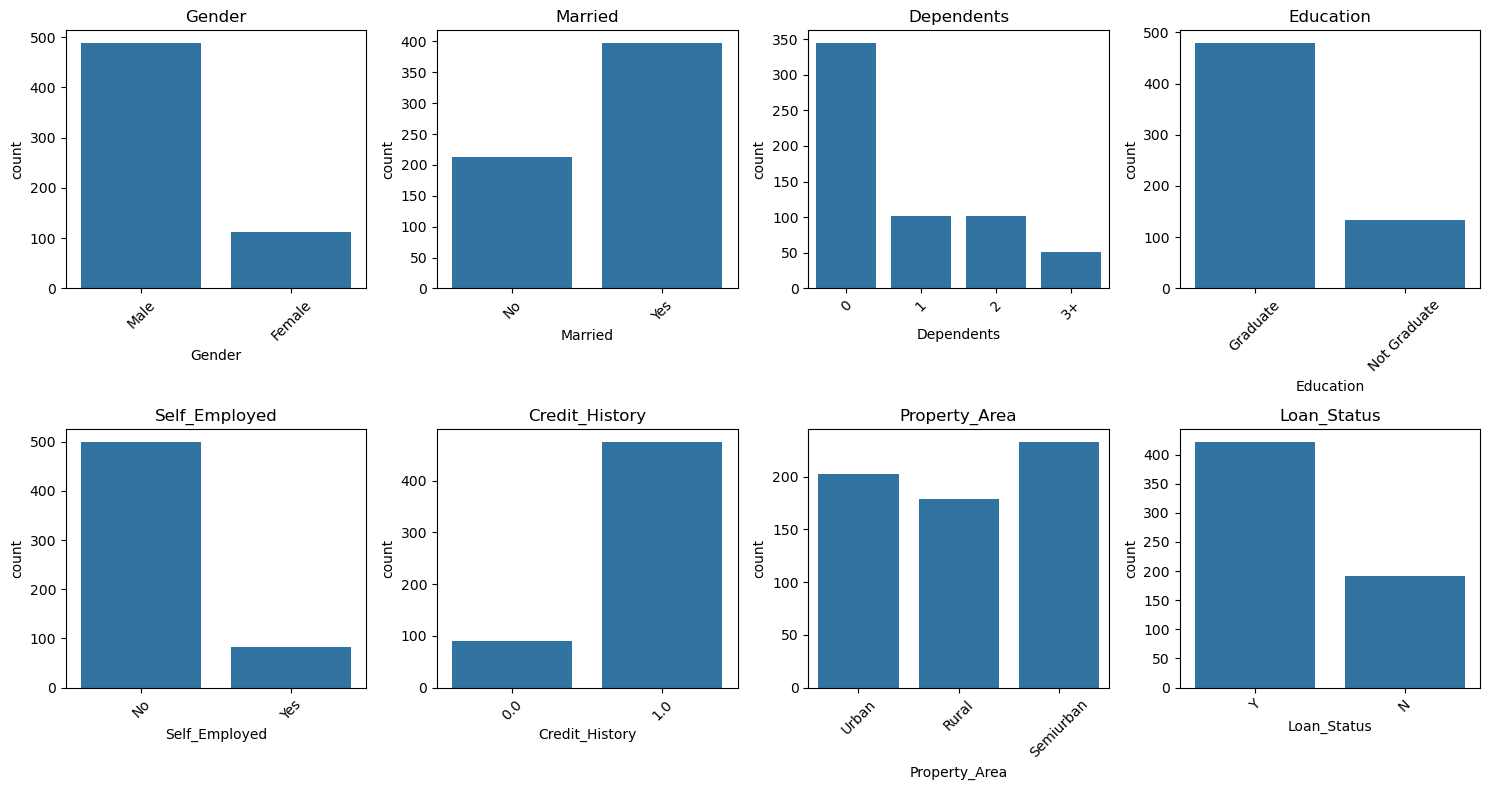

In [4]:
# Categorical variables countplot
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

plt.figure(figsize=(15,8))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 4, i)
    sns.countplot(data=train, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



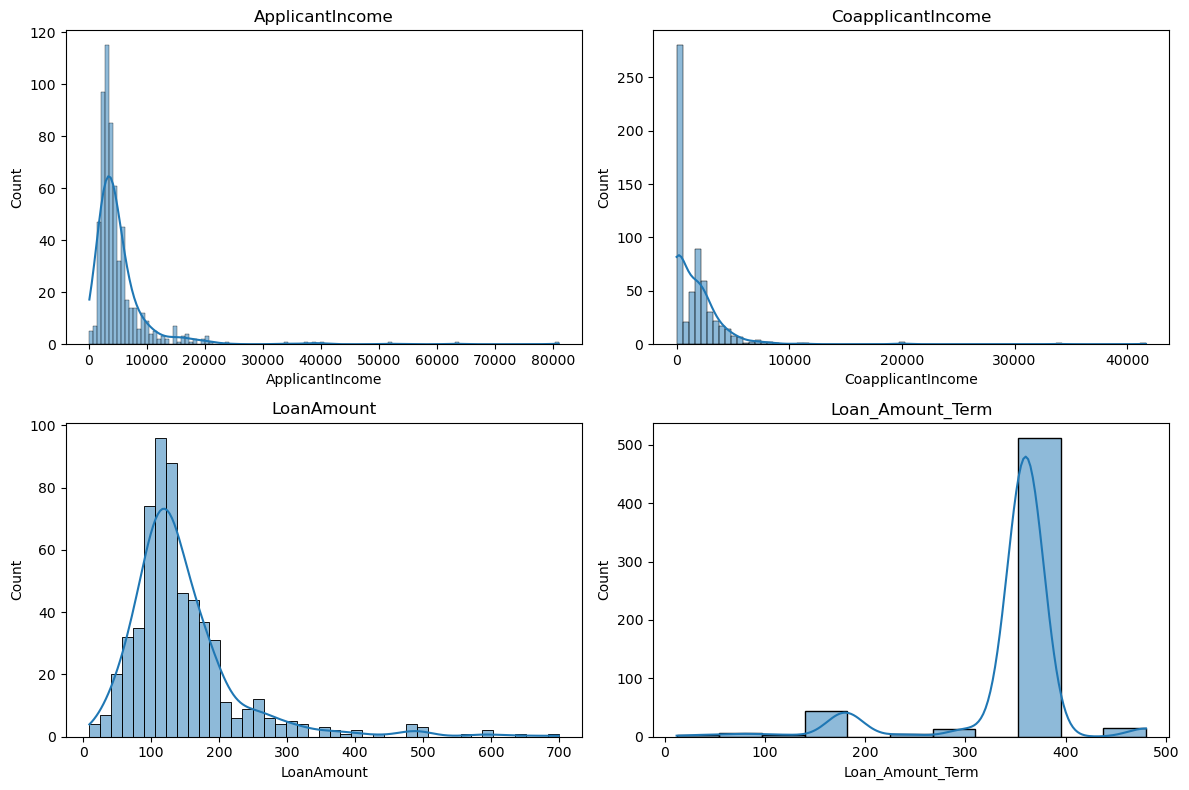

In [5]:
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


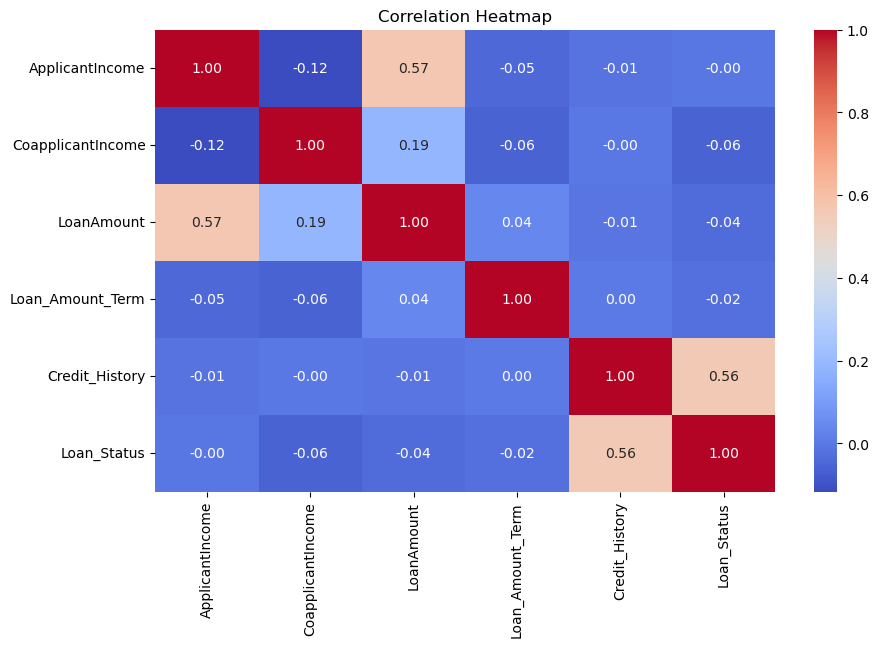

In [6]:
# Map Loan_Status to numeric
train_encoded = train.copy()
train_encoded['Loan_Status'] = train_encoded['Loan_Status'].map({'Y': 1, 'N': 0})

# Keep only numeric columns for correlation
numeric_cols = train_encoded.select_dtypes(include=['int64', 'float64']).columns
corr = train_encoded[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()




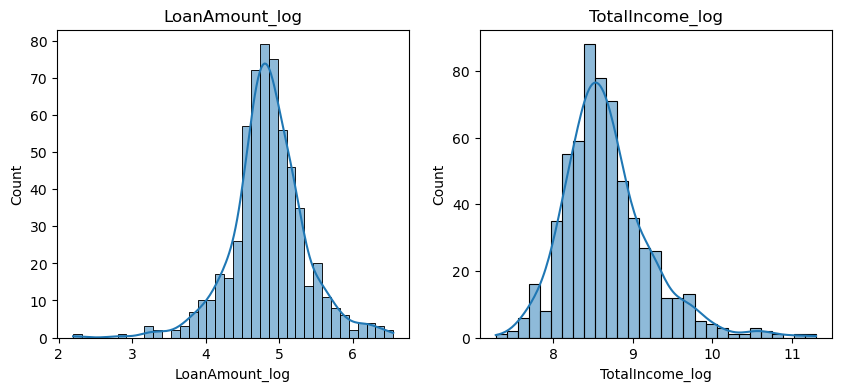

In [7]:
# Total income
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

# Log transformations to reduce skewness
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['TotalIncome_log'] = np.log(train['TotalIncome'])

# Check distributions
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(train['LoanAmount_log'], kde=True)
plt.title('LoanAmount_log')
plt.subplot(1,2,2)
sns.histplot(train['TotalIncome_log'], kde=True)
plt.title('TotalIncome_log')
plt.show()


In [8]:
# Remove extreme LoanAmount outliers
q1 = train['LoanAmount'].quantile(0.25)
q3 = train['LoanAmount'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

train = train[(train['LoanAmount'] >= lower_limit) & (train['LoanAmount'] <= upper_limit)]


In [9]:
# Fill categorical with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    train[col].fillna(train[col].mode()[0], inplace=True)

# Fill numerical with median
for col in ['LoanAmount', 'Loan_Amount_Term']:
    train[col].fillna(train[col].median(), inplace=True)


In [10]:
train_encoded = pd.get_dummies(train, drop_first=True)
train_encoded.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,LoanAmount_log,TotalIncome_log,Loan_ID_LP001005,Loan_ID_LP001006,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,6091.0,4.852030,8.714568,False,False,...,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,3000.0,4.189655,8.006368,True,False,...,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,4941.0,4.787492,8.505323,False,True,...,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,6000.0,4.948760,8.699515,False,False,...,True,False,False,False,False,False,False,False,True,True
5,5417,4196.0,267.0,360.0,1.0,9613.0,5.587249,9.170872,False,False,...,True,True,False,True,False,False,True,False,True,True


In [11]:
from sklearn.feature_selection import SelectKBest, f_classif

X = train_encoded.drop('Loan_Status_Y', axis=1)
y = train_encoded['Loan_Status_Y']

selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y)

scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
scores.sort_values(by='Score', ascending=False)


,Feature,Score
4,Credit_History,252.579071
567,Property_Area_Semiurban,8.050284
561,Married_Yes,4.712376
565,Education_Not Graduate,4.136705
545,Loan_ID_LP002941,2.336972
...,...,...
566,Self_Employed_Yes,0.218254
0,ApplicantIncome,0.126630
1,CoapplicantIncome,0.048842
5,TotalIncome,0.035912


In [12]:
train_encoded.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
                          ..
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
Length: 570, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = train_encoded.drop('Loan_Status_Y', axis=1)
y = train_encoded['Loan_Status_Y']

# Split train.csv into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set shape:", X_train.shape)
print("Validation set shape:", X_valid.shape)


Train set shape: (442, 569)
Validation set shape: (111, 569)


In [14]:
# Step 1: Import
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Step 3: Fit on training data
log_reg.fit(X_train, y_train)

# Step 4: Predict on validation set
y_pred = log_reg.predict(X_valid)

# Step 5: Evaluate performance
print("🔹 Logistic Regression Accuracy:", accuracy_score(y_valid, y_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_valid, y_pred))


🔹 Logistic Regression Accuracy: 0.8468468468468469

🔹 Confusion Matrix:
 [[18 15]
 [ 2 76]]

🔹 Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.55      0.68        33
        True       0.84      0.97      0.90        78

    accuracy                           0.85       111
   macro avg       0.87      0.76      0.79       111
weighted avg       0.85      0.85      0.83       111



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Re-train Logistic Regression with class balancing
log_reg_balanced = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg_balanced.fit(X_train, y_train)

# Predictions
y_pred_balanced = log_reg_balanced.predict(X_valid)

# Evaluation
print("🔹 Logistic Regression (Balanced) Accuracy:", accuracy_score(y_valid, y_pred_balanced))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_balanced))
print("\n🔹 Classification Report:\n", classification_report(y_valid, y_pred_balanced))


🔹 Logistic Regression (Balanced) Accuracy: 0.7297297297297297

🔹 Confusion Matrix:
 [[21 12]
 [18 60]]

🔹 Classification Report:
               precision    recall  f1-score   support

       False       0.54      0.64      0.58        33
        True       0.83      0.77      0.80        78

    accuracy                           0.73       111
   macro avg       0.69      0.70      0.69       111
weighted avg       0.75      0.73      0.74       111



Threshold: 0.10
Accuracy: 0.8198198198198198
Confusion Matrix:
 [[15 18]
 [ 2 76]]
              precision    recall  f1-score   support

       False       0.88      0.45      0.60        33
        True       0.81      0.97      0.88        78

    accuracy                           0.82       111
   macro avg       0.85      0.71      0.74       111
weighted avg       0.83      0.82      0.80       111

--------------------------------------------------
Threshold: 0.15
Accuracy: 0.8378378378378378
Confusion Matrix:
 [[17 16]
 [ 2 76]]
              precision    recall  f1-score   support

       False       0.89      0.52      0.65        33
        True       0.83      0.97      0.89        78

    accuracy                           0.84       111
   macro avg       0.86      0.74      0.77       111
weighted avg       0.85      0.84      0.82       111

--------------------------------------------------
Threshold: 0.20
Accuracy: 0.8468468468468469
Confusion Matrix:
 [[18 15]
 [ 2 

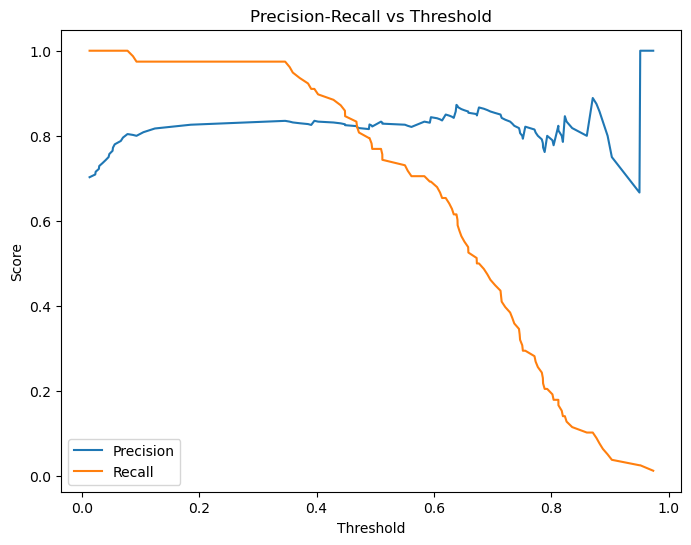

In [16]:
#tuning classisfication threshhold 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve

# Get predicted probabilities
y_proba = log_reg_balanced.predict_proba(X_valid)[:, 1]

# Try different thresholds
thresholds = np.arange(0.1, 0.9, 0.05)
for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    print(f"Threshold: {t:.2f}")
    print("Accuracy:", accuracy_score(y_valid, y_pred_t))
    print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_t))
    print(classification_report(y_valid, y_pred_t))
    print("-"*50)

# Optional: Plot Precision-Recall curve
precision, recall, thres = precision_recall_curve(y_valid, y_proba)

plt.figure(figsize=(8,6))
plt.plot(thres, precision[:-1], label="Precision")
plt.plot(thres, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.show()


In [17]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_valid)

# Evaluation
print("🔹 Random Forest Accuracy:", accuracy_score(y_valid, y_pred_rf))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_rf))
print("\n🔹 Classification Report:\n", classification_report(y_valid, y_pred_rf))


🔹 Random Forest Accuracy: 0.8378378378378378

🔹 Confusion Matrix:
 [[17 16]
 [ 2 76]]

🔹 Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.52      0.65        33
        True       0.83      0.97      0.89        78

    accuracy                           0.84       111
   macro avg       0.86      0.74      0.77       111
weighted avg       0.85      0.84      0.82       111



In [18]:
!pip install xgboost


In [19]:
#xgboost
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train)  # handles imbalance
)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_valid)

# Evaluation
print("🔹 XGBoost Accuracy:", accuracy_score(y_valid, y_pred_xgb))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_xgb))
print("\n🔹 Classification Report:\n", classification_report(y_valid, y_pred_xgb))


🔹 XGBoost Accuracy: 0.7837837837837838

🔹 Confusion Matrix:
 [[24  9]
 [15 63]]

🔹 Classification Report:
               precision    recall  f1-score   support

       False       0.62      0.73      0.67        33
        True       0.88      0.81      0.84        78

    accuracy                           0.78       111
   macro avg       0.75      0.77      0.75       111
weighted avg       0.80      0.78      0.79       111



In [20]:
#tuning xgboost to improve accuracy while maintainng balance 
#XGBoost Hyperparameter Tuning Code
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define base model
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Define parameter grid (you can expand later)
param_grid = {
    'n_estimators': [100, 200, 300],      # number of trees
    'max_depth': [3, 4, 5, 6],           # tree depth
    'learning_rate': [0.01, 0.05, 0.1],  # step size shrinkage
    'subsample': [0.8, 1],               # sample ratio per tree
    'colsample_bytree': [0.8, 1],        # feature sampling per tree
    'scale_pos_weight': [
        (len(y_train)-sum(y_train))/sum(y_train)  # handle imbalance
    ]
}

# Run grid search (can be slow)
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Train best model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_valid)

# Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("🔹 XGBoost (Tuned) Accuracy:", accuracy_score(y_valid, y_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_valid, y_pred))


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'scale_pos_weight': 0.43042071197411, 'subsample': 1}
Best CV Score: 0.7828338542624257
🔹 XGBoost (Tuned) Accuracy: 0.8198198198198198

🔹 Confusion Matrix:
 [[20 13]
 [ 7 71]]

🔹 Classification Report:
               precision    recall  f1-score   support

       False       0.74      0.61      0.67        33
        True       0.85      0.91      0.88        78

    accuracy                           0.82       111
   macro avg       0.79      0.76      0.77       111
weighted avg       0.81      0.82      0.81       111



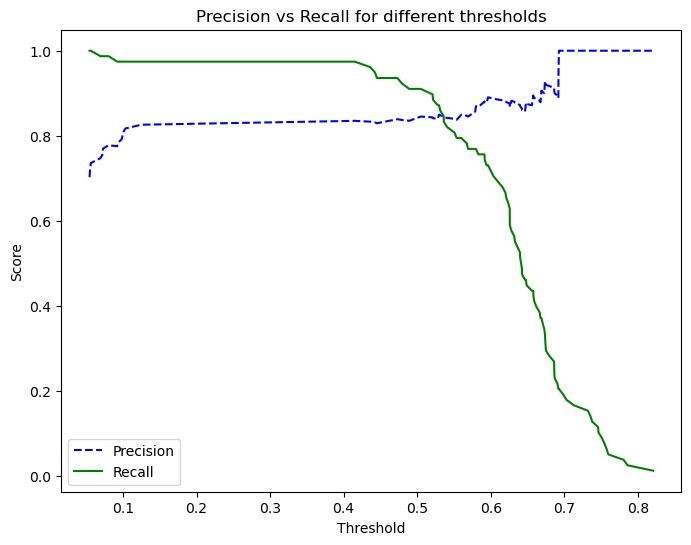

In [21]:
#tuningthe classification threshhold

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, classification_report

# Get predicted probabilities
y_probs = best_xgb.predict_proba(X_valid)[:, 1]  # probability for class "True" (Y)

# Precision-Recall curve
precisions, recalls, thresholds = precision_recall_curve(y_valid, y_probs)

# Plot precision and recall against threshold
plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall for different thresholds")
plt.legend()
plt.show()



In [22]:
# Best threshold for F1 (already calculated earlier)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print("Best Threshold:", best_threshold)


Best Threshold: 0.41509253


In [30]:
y_pred_thresh = (y_probs >= best_threshold).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_thresh))
print("\nClassification Report:\n", classification_report(y_valid, y_pred_thresh))


Confusion Matrix:
 [[18 15]
 [ 2 76]]

Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.55      0.68        33
        True       0.84      0.97      0.90        78

    accuracy                           0.85       111
   macro avg       0.87      0.76      0.79       111
weighted avg       0.85      0.85      0.83       111



In [24]:
y_pred_thresh = (y_probs >= 0.5).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_thresh))
print("\nClassification Report:\n", classification_report(y_valid, y_pred_thresh))


Confusion Matrix:
 [[20 13]
 [ 7 71]]

Classification Report:
               precision    recall  f1-score   support

       False       0.74      0.61      0.67        33
        True       0.85      0.91      0.88        78

    accuracy                           0.82       111
   macro avg       0.79      0.76      0.77       111
weighted avg       0.81      0.82      0.81       111



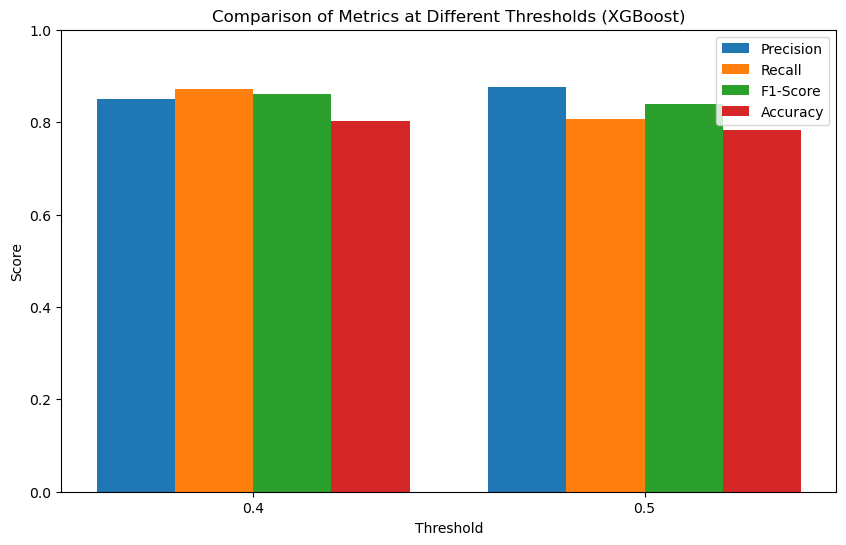

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Predict probabilities using the tuned model
y_proba = xgb_model.predict_proba(X_valid)[:, 1]

# Define thresholds to compare
thresholds = [0.4, 0.5]
metrics = {"Precision": [], "Recall": [], "F1-Score": [], "Accuracy": []}

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    metrics["Precision"].append(precision_score(y_valid, y_pred))
    metrics["Recall"].append(recall_score(y_valid, y_pred))
    metrics["F1-Score"].append(f1_score(y_valid, y_pred))
    metrics["Accuracy"].append(accuracy_score(y_valid, y_pred))

# Plot
x = np.arange(len(thresholds))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, metrics["Precision"], width, label="Precision")
plt.bar(x - 0.5*width, metrics["Recall"], width, label="Recall")
plt.bar(x + 0.5*width, metrics["F1-Score"], width, label="F1-Score")
plt.bar(x + 1.5*width, metrics["Accuracy"], width, label="Accuracy")

plt.xticks(x, thresholds)
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Comparison of Metrics at Different Thresholds (XGBoost)")
plt.legend()
plt.ylim(0, 1)
plt.show()



In [26]:
import pandas as pd

# Create DataFrame for comparison
results_df = pd.DataFrame(metrics, index=[f"Threshold={t}" for t in thresholds])

print("🔹 Threshold Comparison Table:\n")
print(results_df.round(3))  # round to 3 decimal places for readability


🔹 Threshold Comparison Table:

               Precision  Recall  F1-Score  Accuracy
Threshold=0.4      0.850   0.872     0.861     0.802
Threshold=0.5      0.875   0.808     0.840     0.784


In [27]:
from xgboost import XGBClassifier
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# ✅ 1. Retrain on FULL training data using best params
xgb_final = XGBClassifier(**grid_search.best_params_, use_label_encoder=False, eval_metric='logloss')
xgb_final.fit(X_train, y_train)  # <-- use the ENTIRE training data (train + valid combined if you had split)

# ✅ 2. Predict probabilities on training set (for threshold adjustment)
y_proba_train = xgb_final.predict_proba(X_train)[:, 1]

# ✅ 3. Apply threshold = 0.4
y_pred_train = (y_proba_train >= 0.4).astype(int)

# ✅ 4. Evaluate performance on training set
print("Confusion Matrix (Train):\n", confusion_matrix(y_train, y_pred_train))
print("\nClassification Report (Train):\n", classification_report(y_train, y_pred_train))
print("Accuracy (Train):", accuracy_score(y_train, y_pred_train))


Confusion Matrix (Train):
 [[ 58  75]
 [  5 304]]

Classification Report (Train):
               precision    recall  f1-score   support

       False       0.92      0.44      0.59       133
        True       0.80      0.98      0.88       309

    accuracy                           0.82       442
   macro avg       0.86      0.71      0.74       442
weighted avg       0.84      0.82      0.80       442

Accuracy (Train): 0.8190045248868778


In [33]:
# 1️⃣ Copy test data
test_encoded = test.copy()

# 2️⃣ One-hot encode categorical variables (no Loan_Status here)
X_test = pd.get_dummies(test_encoded, drop_first=True)

# 3️⃣ Align columns with training
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 4️⃣ Predict probabilities
y_test_proba = xgb_model.predict_proba(X_test)[:, 1]

# 5️⃣ Apply threshold = 0.4
y_test_pred = (y_test_proba >= 0.4).astype(int)

# 6️⃣ Convert predictions back to Y/N for submission
submission = pd.DataFrame({
    "Loan_ID": test["Loan_ID"],   # assuming Loan_ID exists in test.csv
    "Loan_Status": pd.Series(y_test_pred).map({1: "Y", 0: "N"})
})

print(submission.head())


    Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           N
3  LP001035           Y
4  LP001051           N


In [34]:
print(submission["Loan_Status"].value_counts())


Loan_Status
N    279
Y     88
Name: count, dtype: int64
